Author: Tashay Green

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import zipfile 
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Loading the CitiBike Data

In [2]:
# Open the zip folder located in HW4_tg1478 folder. Read the csv file inside.
myzip = zipfile.ZipFile('201506-citibike-tripdata.zip')
myzip.extractall()
myzip.open('201506-citibike-tripdata.csv')
df = pd.read_csv('201506-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0


# Separating the Data by Age & Gender

In [3]:
# df is the dataframe where the content of the csv file is stored. 
# Filtering riders by gender. 
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [4]:
# Dropping data that I do not need.
df.drop(df.columns[[1,2,3,4,5,6,7,8,9,10,11]], axis =1, inplace = True)
df.head()

,tripduration,usertype,birth year,gender,ageM,ageF
0,1338,Subscriber,1984.0,1,31.0,NaN
1,290,Subscriber,1997.0,1,18.0,NaN
2,634,Subscriber,1993.0,1,22.0,NaN
3,159,Subscriber,1981.0,1,34.0,NaN
4,1233,Customer,NaN,0,NaN,NaN


In [5]:
df.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,birth year,gender,ageM,ageF
count,9.412190e+05,810827.000000,941219.000000,621580.000000,188655.000000
mean,9.046028e+02,1976.256380,1.061284,39.113612,37.509560
std,3.446744e+03,11.465324,0.579512,11.483732,11.221308
min,6.000000e+01,1885.000000,0.000000,16.000000,16.000000
25%,4.010000e+02,NaN,1.000000,NaN,NaN
50%,6.460000e+02,NaN,1.000000,NaN,NaN
75%,1.064000e+03,NaN,1.000000,NaN,NaN
max,1.691873e+06,1999.000000,2.000000,130.000000,114.000000


In [6]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

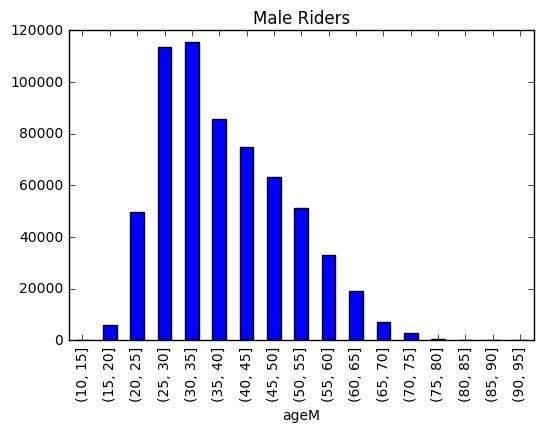

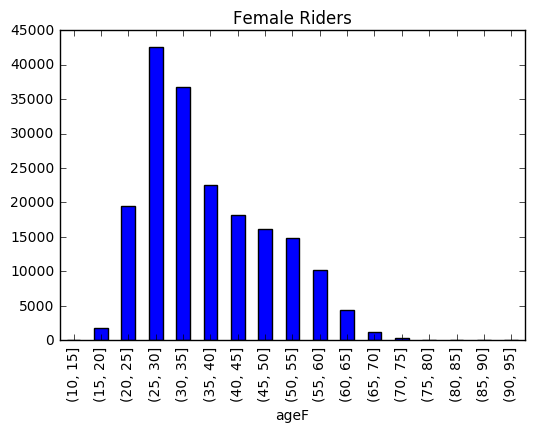

In [7]:
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("Male Riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("Female Riders")

### Figure 1: Distribution of CitiBike riders' ages by gender

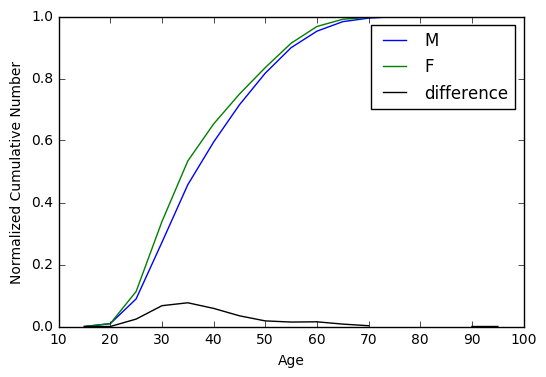

In [8]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

### Figure 2: Cumulative Distribution of CitiBike riders' ages by gender

# Statistical Tests (Pearson, Spearman, K-S)

### Null Hypothesis: 
There is no difference between the age distributions of CitiBike rider by gender, significance level p=0.05. 

### Alternative Hypothesis: 
There is a difference between the age distributions of CitiBike rider by gender, significance level p=0.05.  

# Pearson's Test

Since the Pearson's is a pairwise test: the samples need to be

- sorted and
- the same size!

In [17]:
# Sort the data 
ageF = sort(df.ageF)
ageM = sort(df.ageM)

# Since there are more male riders, you must make the sample the same size as the female riders. 
ageM = sort(df.ageM[:len(ageF)])

pearson = scipy.stats.pearsonr(ageF, ageM)
print (pearson)

(0.99555906182720455, 0.0)


The Pearson test returns a p-value of 0.0 which is below the significance level 0.05, allowing us to reject the Null Hypothesis. 

# Spearman's Test

In [10]:
scipy.stats.spearmanr(ageF,ageM)

SpearmanrResult(correlation=0.99908006258274684, pvalue=0.0)

The Spearman test returns a p-value of 0.0 which is below the significance level 0.05, allowing us to reject the Null Hypothesis. 

# K-S Test

In [11]:
ks = scipy.stats.ks_2samp(df.ageF, df.ageM)
print (ks)

Ks_2sampResult(statistic=0.076862276800960139, pvalue=0.0)


The K-S test returns a p-value of 0.0 which allows us to reject the Null Hypothesis, confirming that there is a difference in the age distribution of CitiBike riders as stated in the Alternative Hypothesis. 

### K-S Test with subsample of the data: taking only 1 ride every of 200

In [20]:
# Creates a new dataframe that only consists of data at increments of 200.
df2_sub = df.iloc[arange(0,len(df),200)]
ks200 = scipy.stats.ks_2samp(df2_sub.ageF, df2_sub.ageM)
print (ks200)

Ks_2sampResult(statistic=0.46101550881665604, pvalue=0.0)


The K-S test returns a p-value of 0.0 which allows us to reject the Null Hypothesis, confirming that there is a difference in the age distribution of CitiBike riders as stated in the Alternative Hypothesis.